In [559]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [560]:
data = pd.read_csv('train.csv')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Overview

In [561]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  1460
Columns  :  81

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

In [562]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Filling out NA values with their actual entries from Data Definition file

In [563]:

data['Alley'] = data['Alley'].fillna('No alley access')
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')
data['BsmtCond'] = data['BsmtCond'].fillna('No Basment')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basment')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basment')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basment')
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')
data['GarageType'] = data['GarageType'].fillna('No Basment')
data['GarageFinish'] = data['GarageFinish'].fillna('No Basment')
data['GarageQual'] = data['GarageQual'].fillna('No Basment')
data['GarageCond'] = data['GarageCond'].fillna('No Basment')
data['PoolQC'] = data['PoolQC'].fillna('No Pool')
data['Fence'] = data['Fence'].fillna('No Fence')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Electrical'] = data['Electrical'].fillna('SBrkr')

In [564]:
# Rechecking the data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
KitchenAbvGr,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000


In [565]:
data.drop(['LotFrontage','GarageYrBlt','MasVnrArea'], axis=1, inplace=True)
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [566]:
# Converting the object data types to categorical

In [567]:
catcolmns = [f for f in data.columns if data.dtypes[f] == 'object']
for i in catcolmns:
    data[i] = data[i].astype('category')

    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

#### Univariate Analysis 

Analyzing the target variable SalePrice for kurtosis and skewness

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

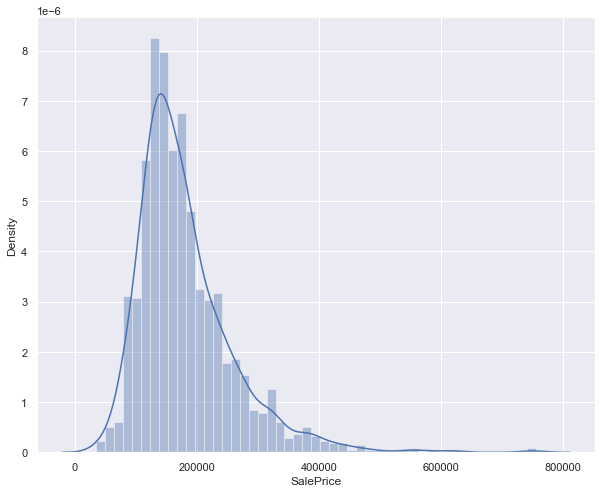

In [568]:
plt.figure(figsize=[10,8])
sns.distplot(data['SalePrice'])

In [569]:
# Checking for skewness and kurtosis values as the target variable is right-skewed

print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Since the values are greater than 1, we have to do log transformation on the target variable & recheck the skew and kurtosis values

Skewness: 0.121335
Kurtosis: 0.809532


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

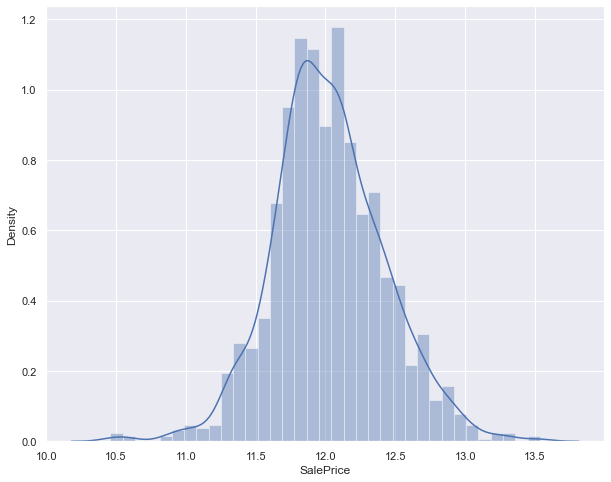

In [570]:
data['SalePrice'] = np.log(data['SalePrice'])
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())
plt.figure(figsize=[10,8])
sns.distplot(data['SalePrice'])

#### Dividing the dataset between numerical and categorical datatypes

In [571]:
numdata = data.select_dtypes(include = ['float64','int64'])
numdata.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [572]:
numdatadf = data[['Id', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
numdatadf.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,12.429216


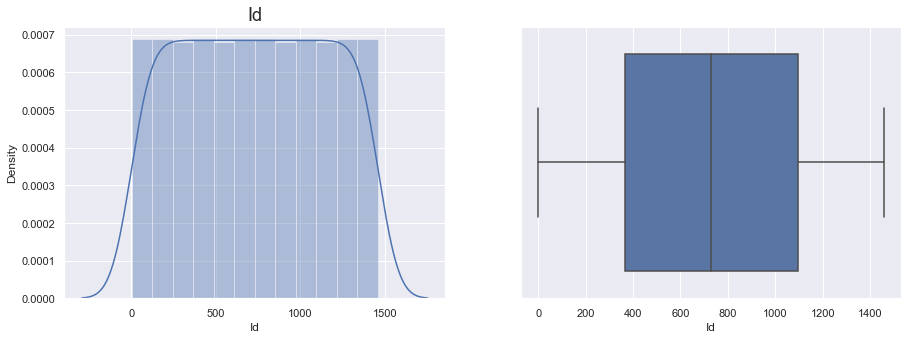

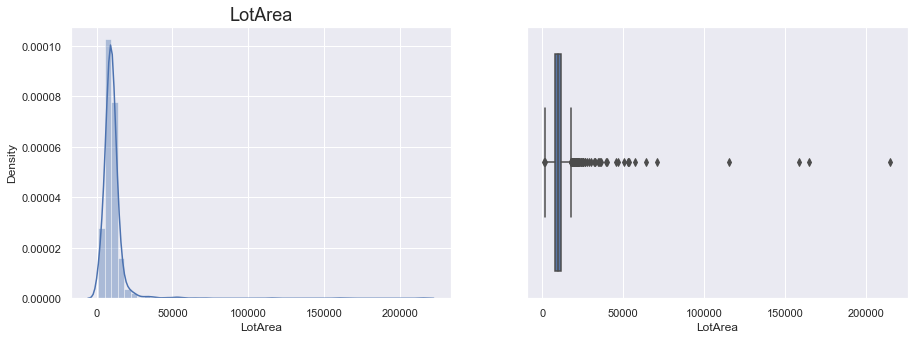

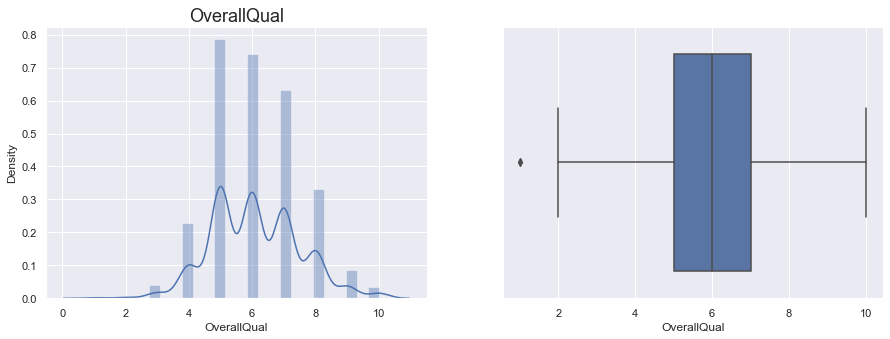

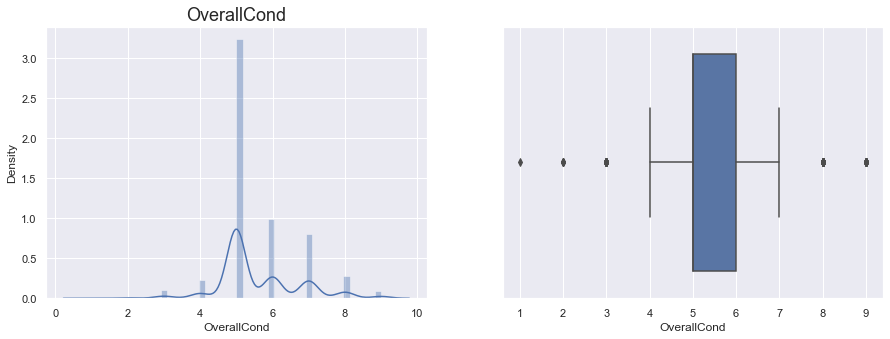

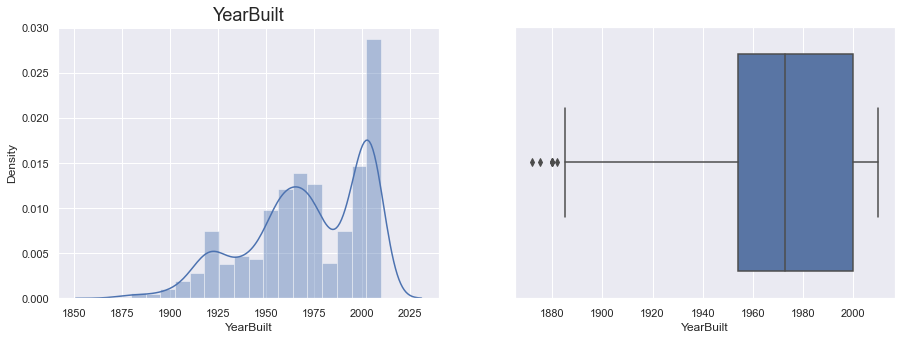

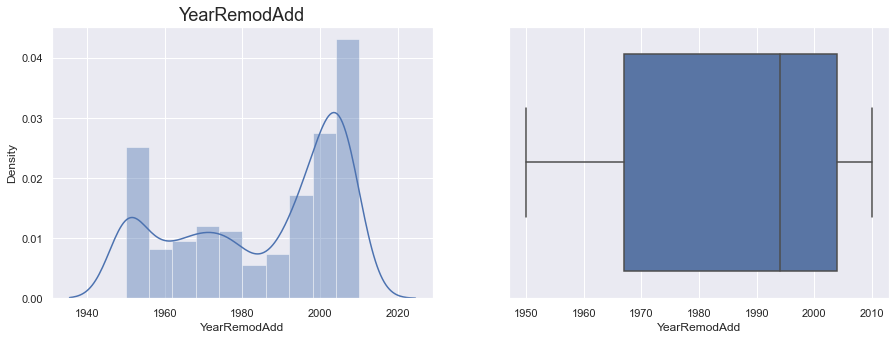

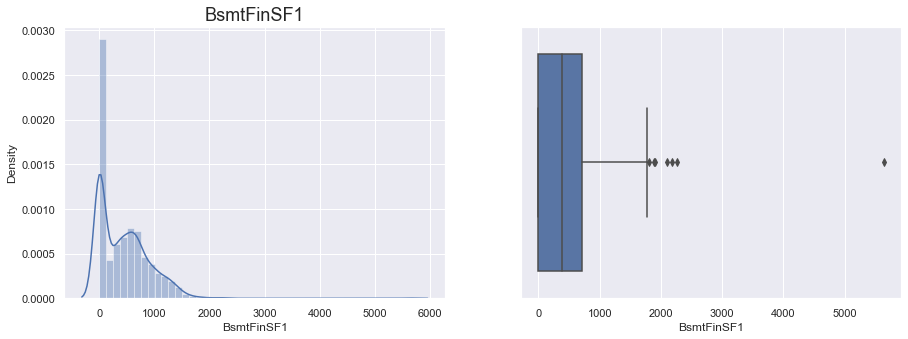

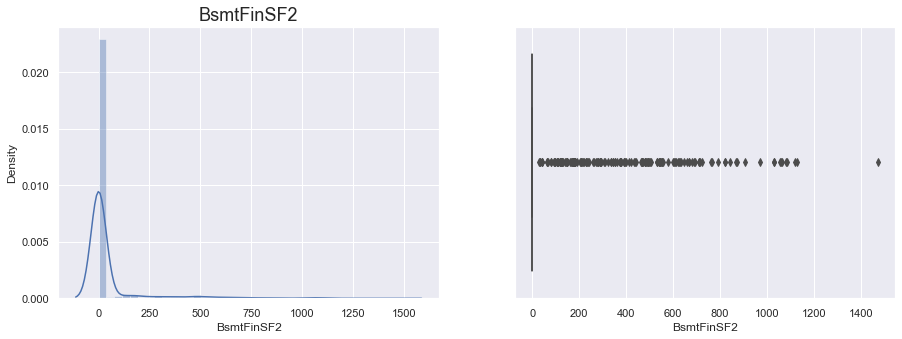

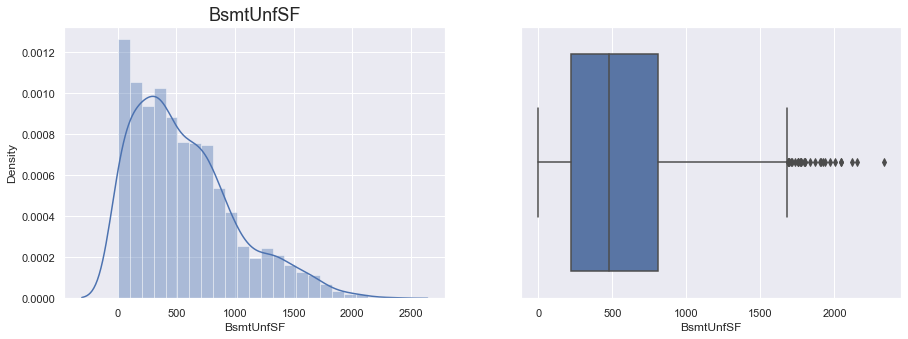

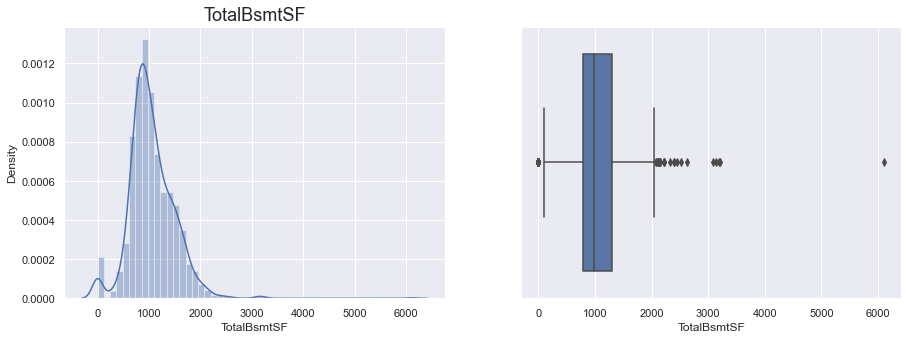

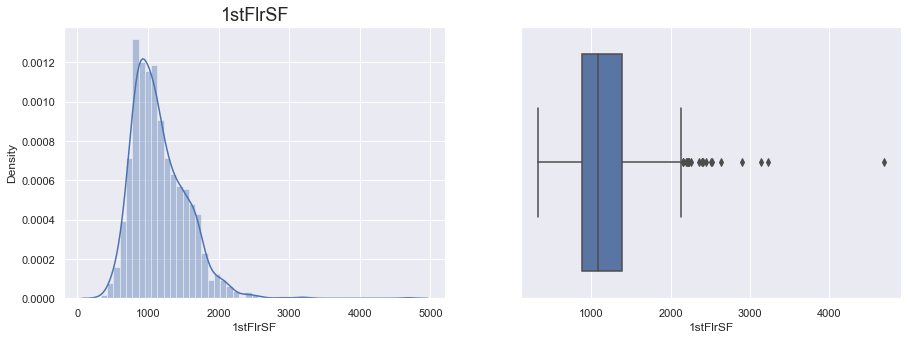

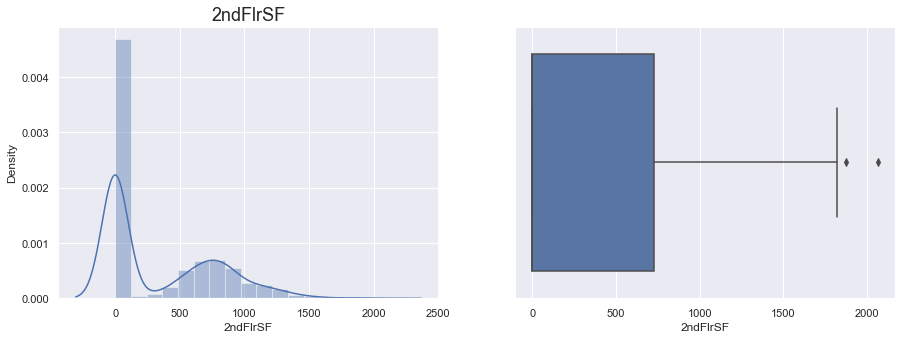

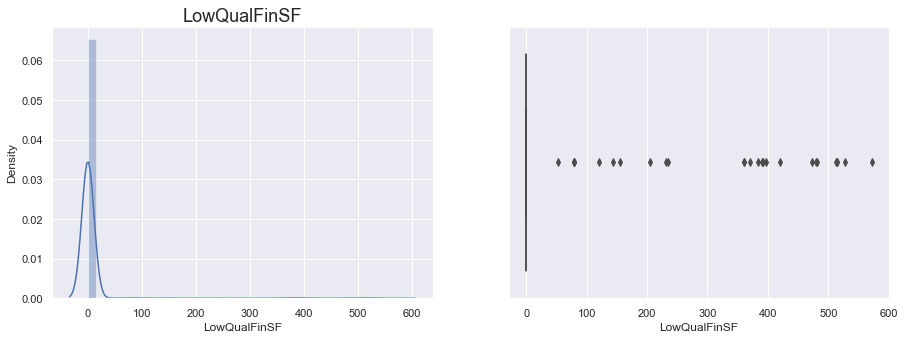

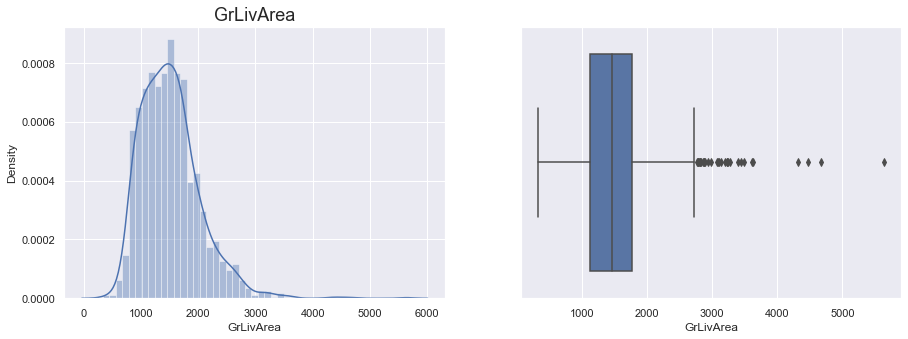

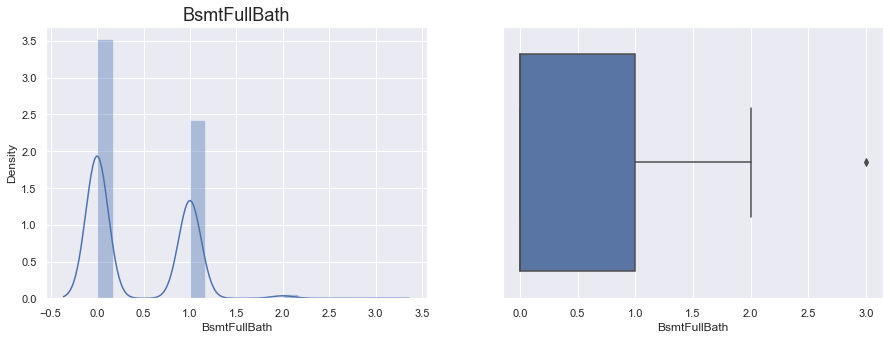

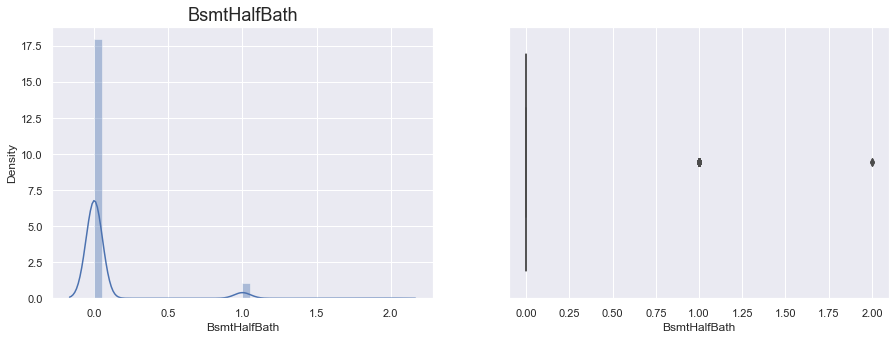

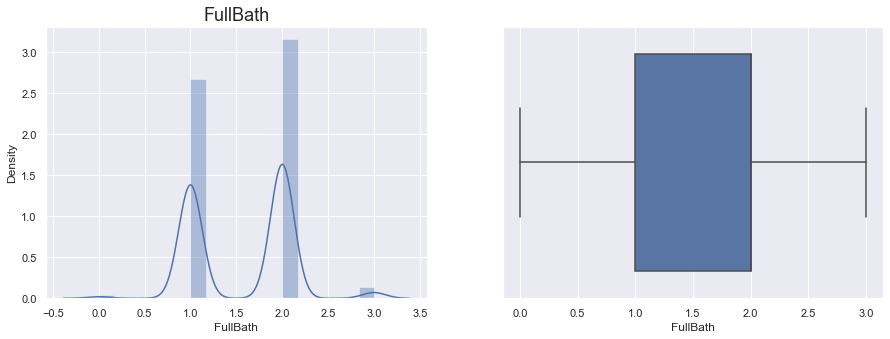

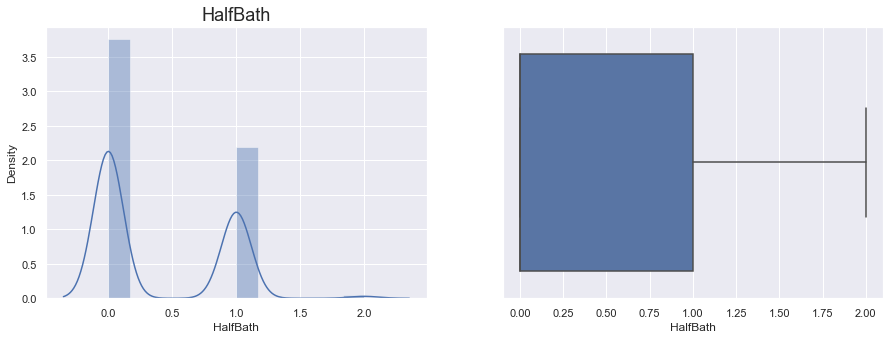

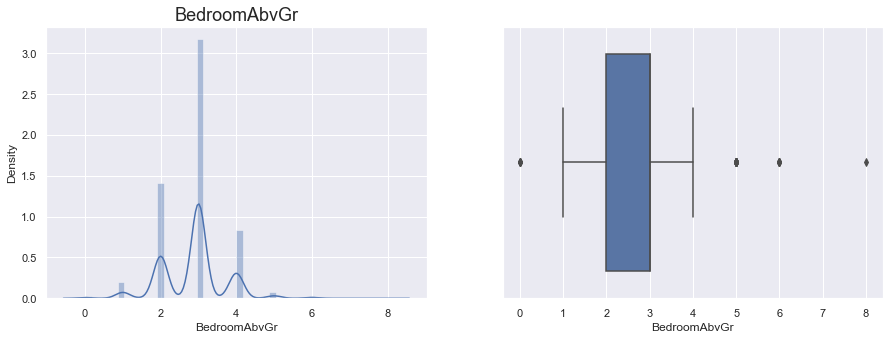

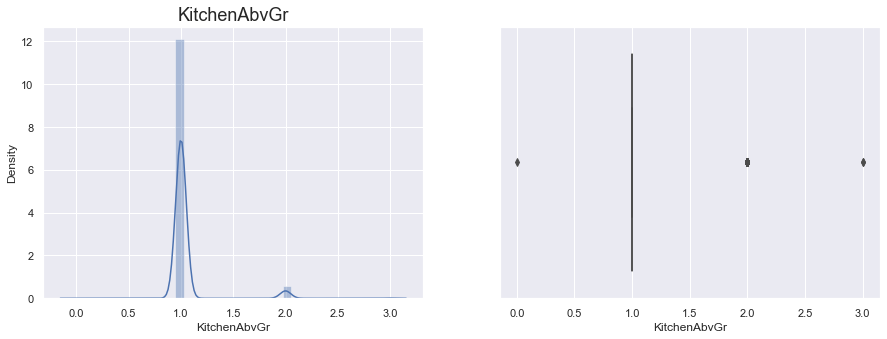

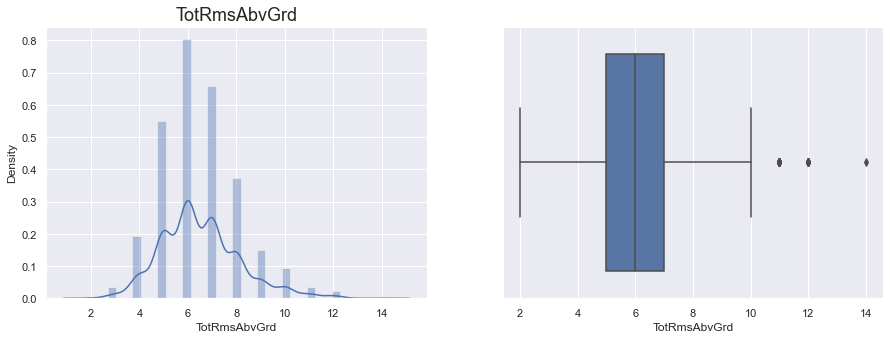

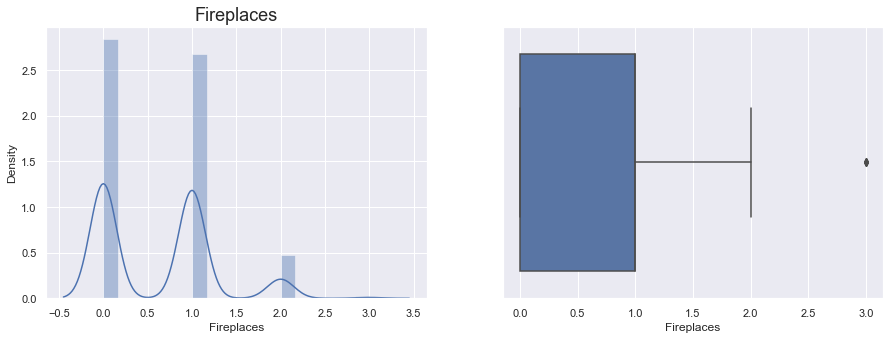

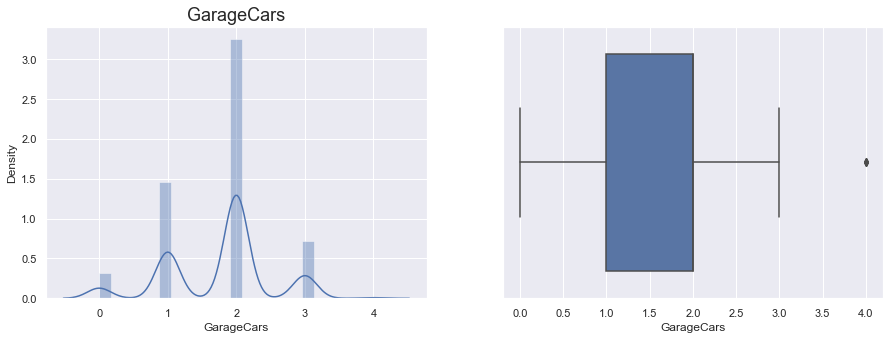

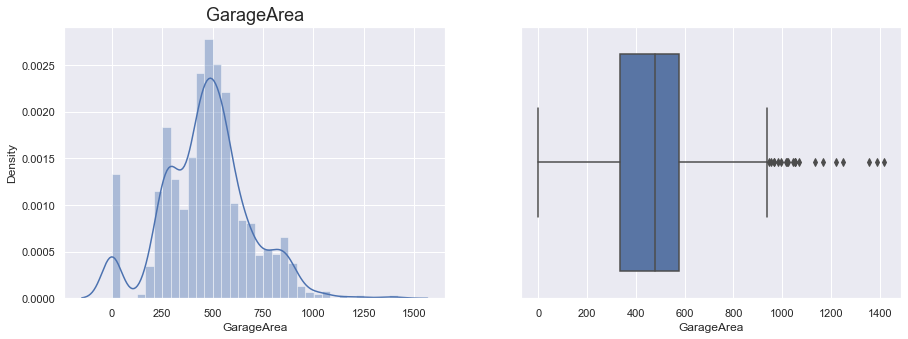

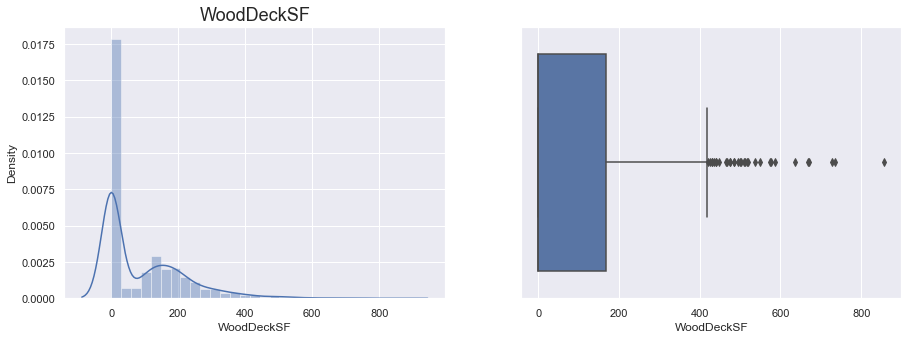

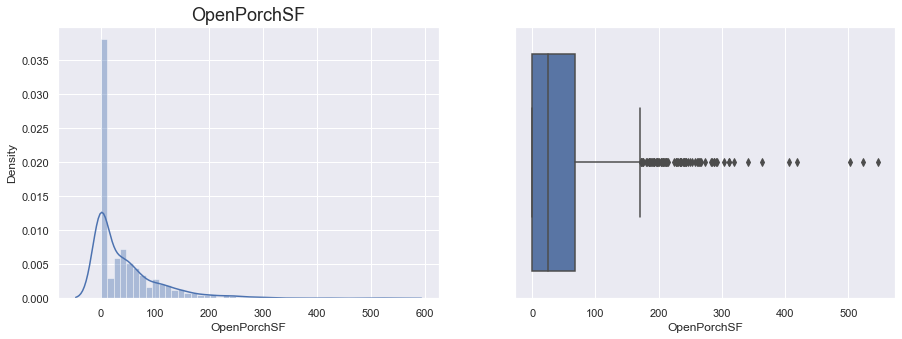

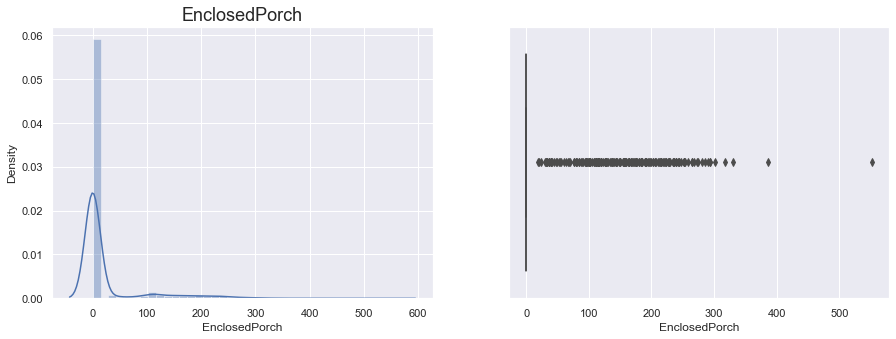

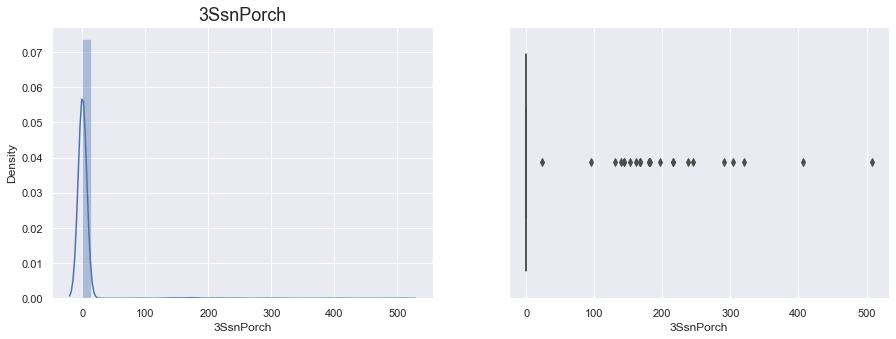

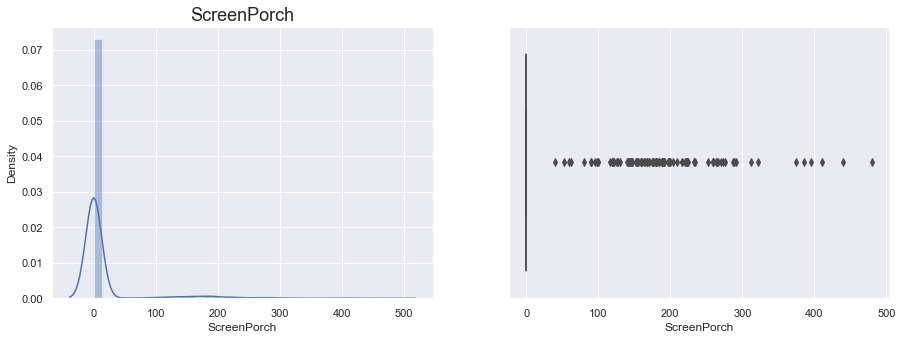

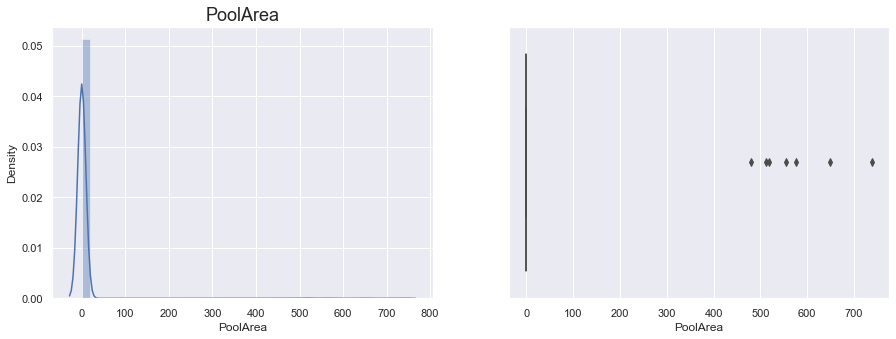

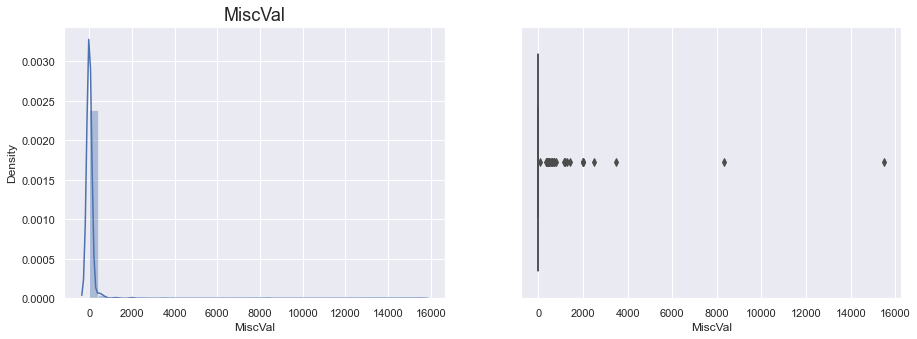

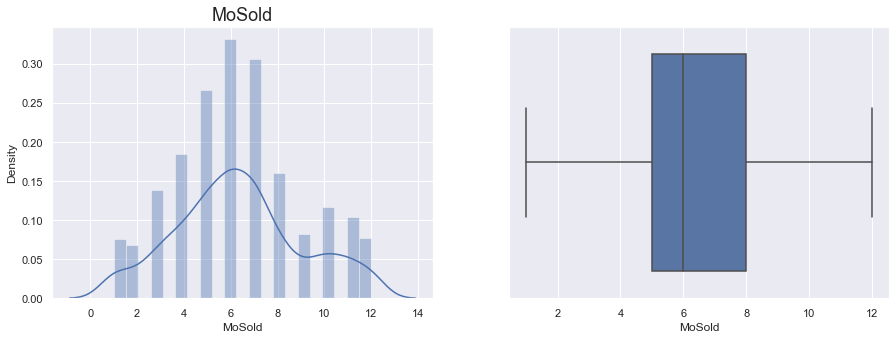

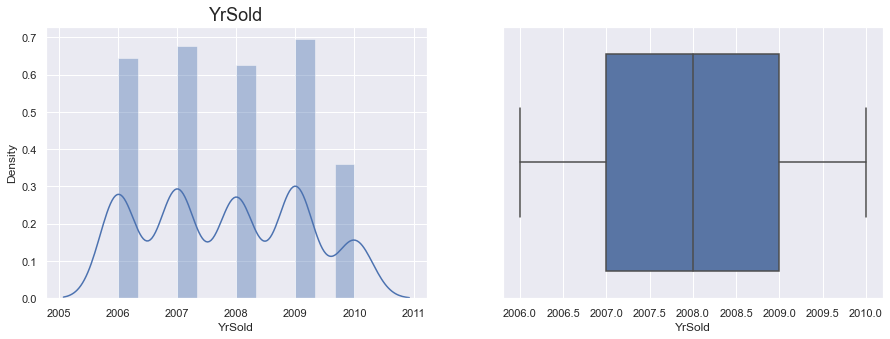

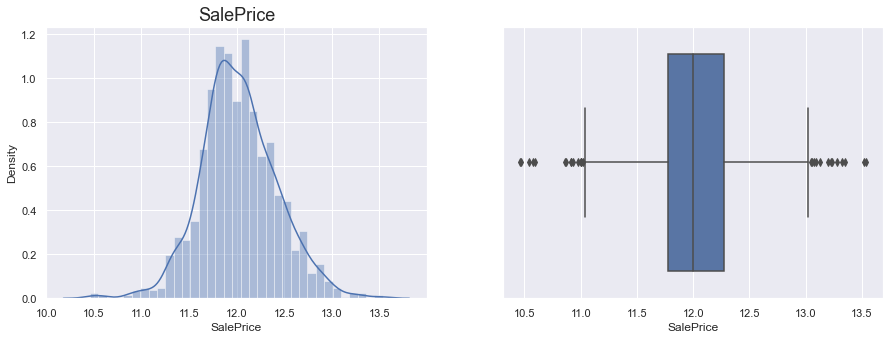

In [573]:
for col in numdatadf.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(numdatadf[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(numdatadf[col])
    plt.show()  

In [574]:
catdata = data.select_dtypes(include=['category'])
catdata.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [575]:
catdatadf = data[['MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']]
catdatadf.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,20,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,60,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,70,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,60,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


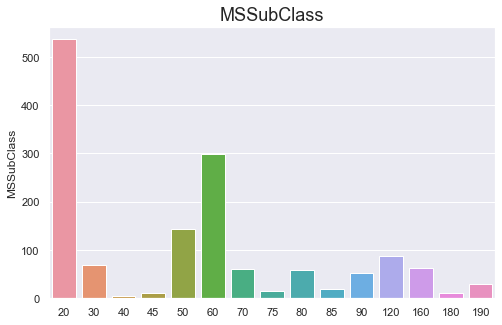

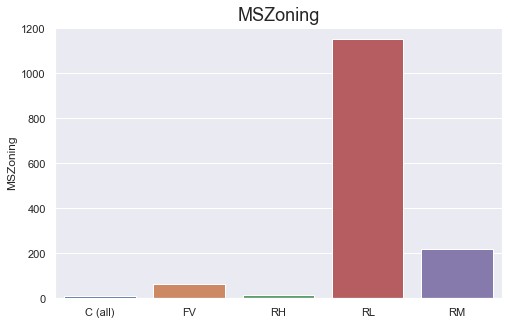

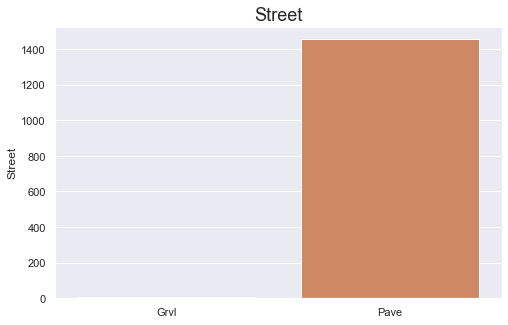

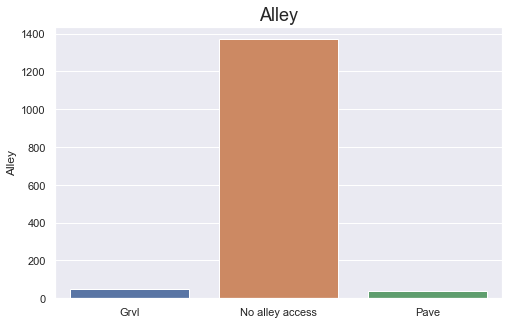

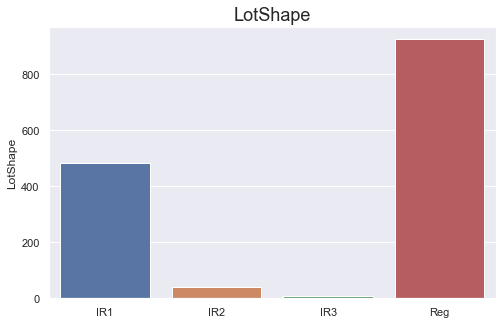

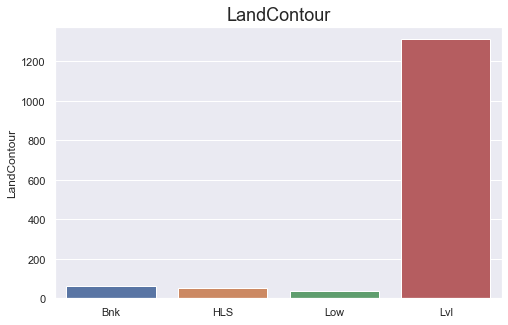

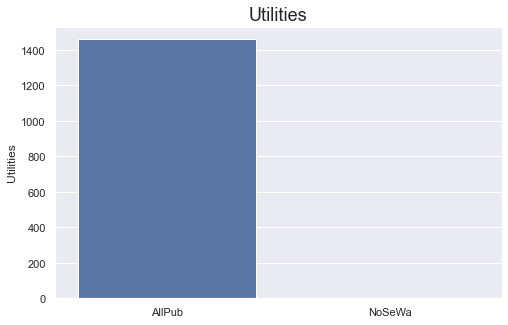

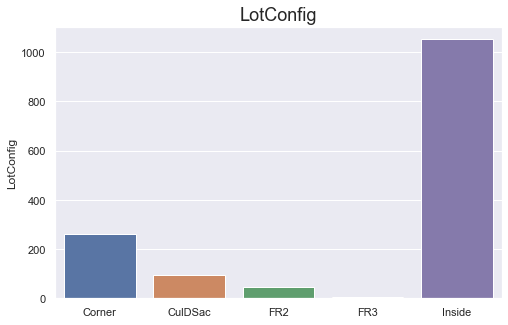

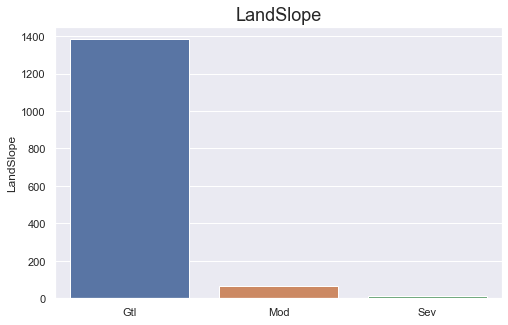

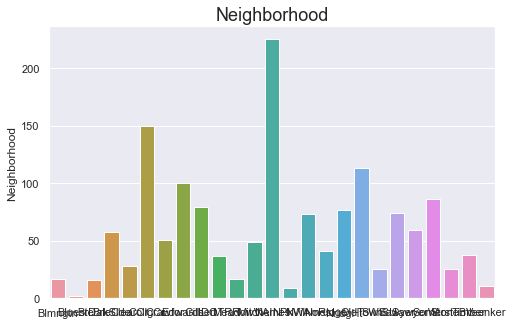

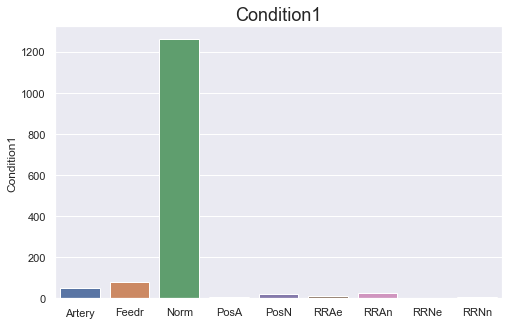

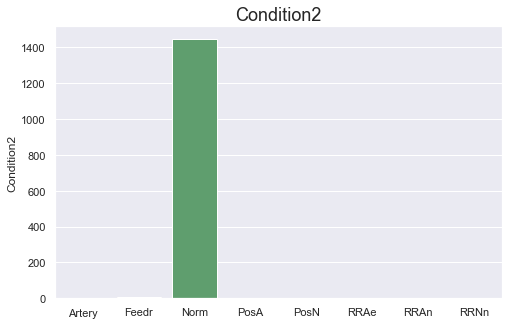

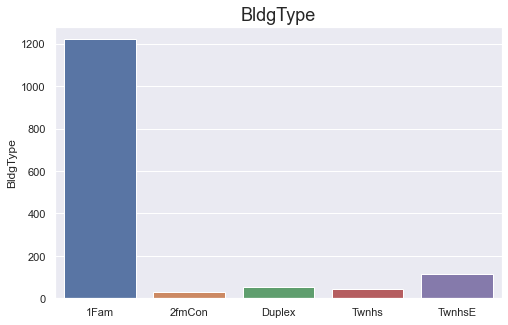

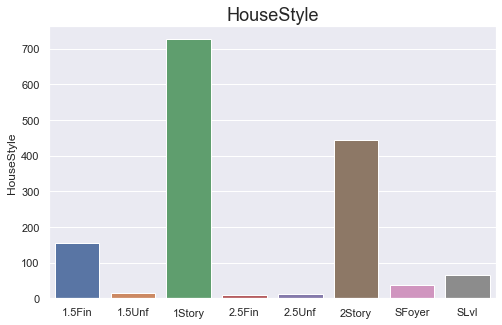

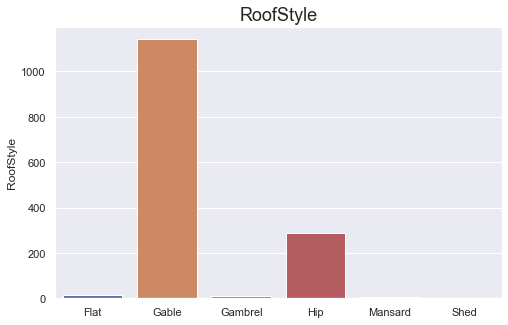

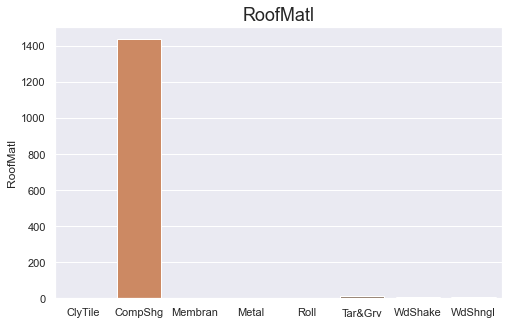

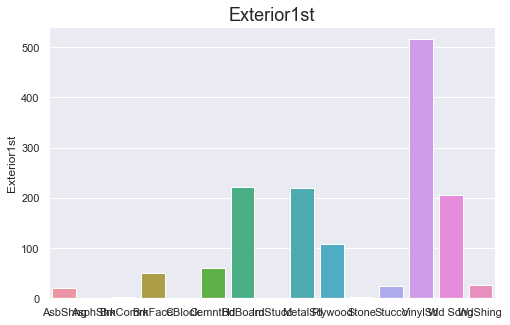

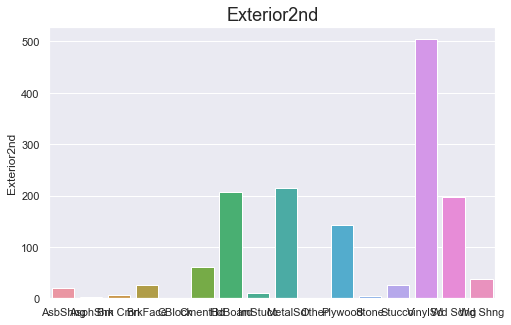

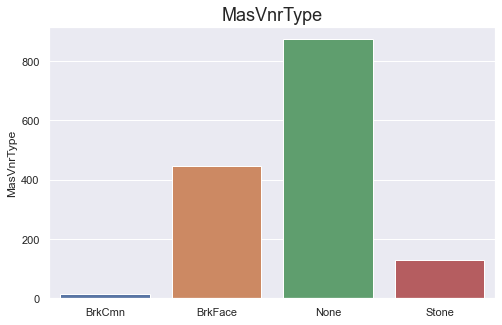

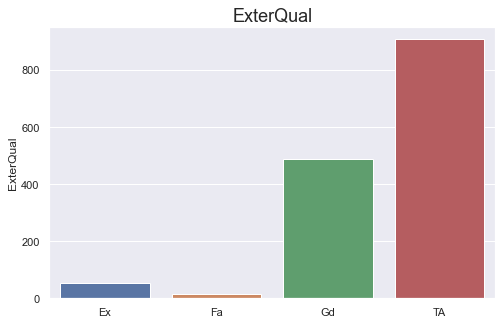

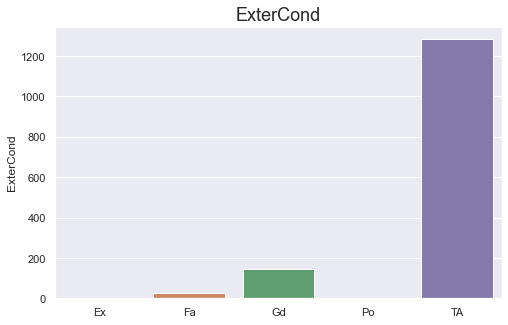

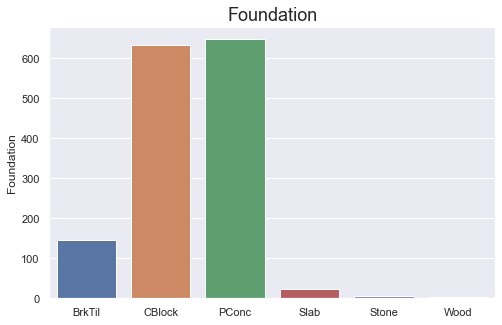

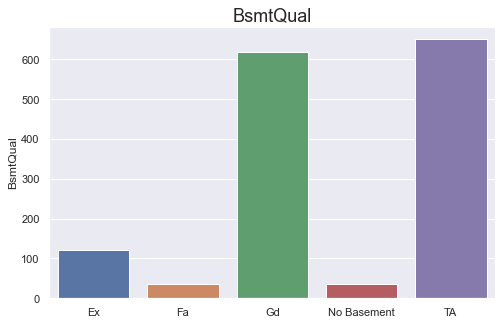

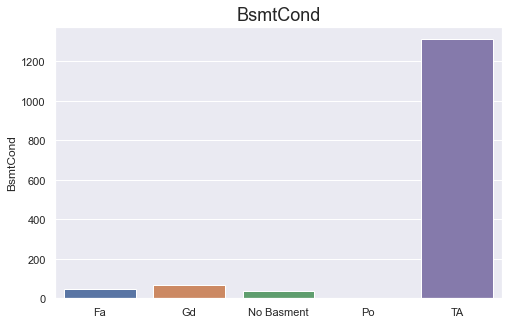

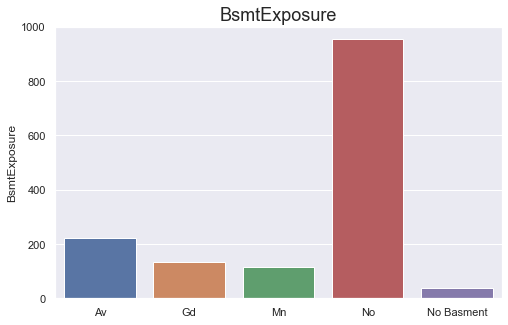

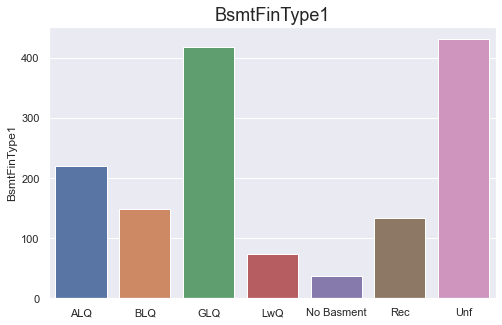

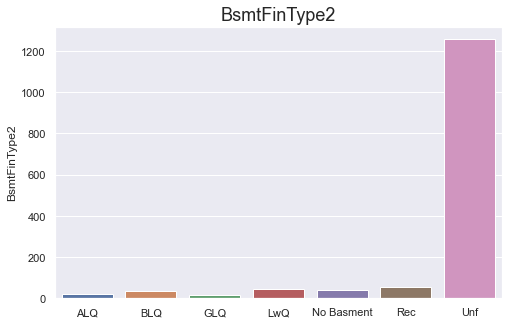

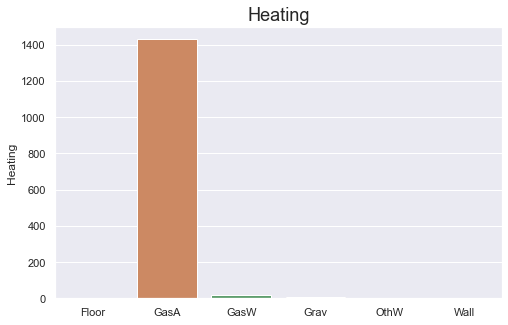

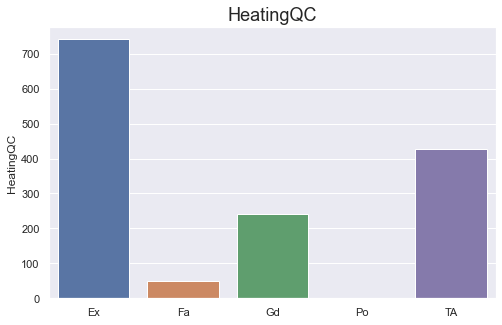

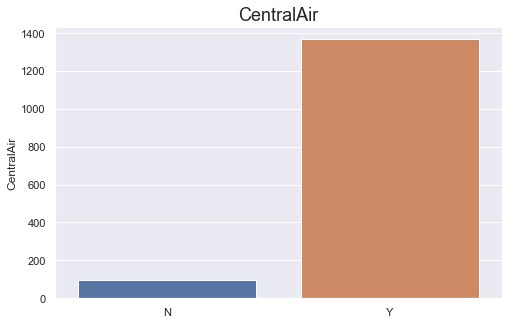

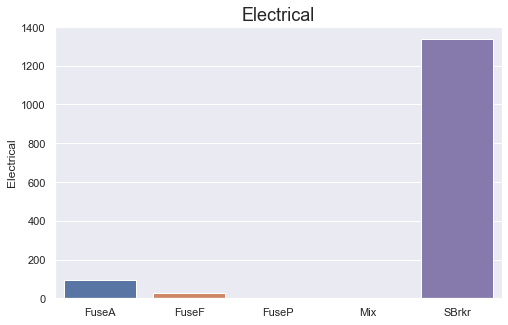

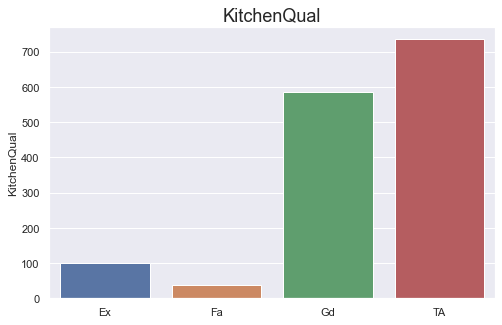

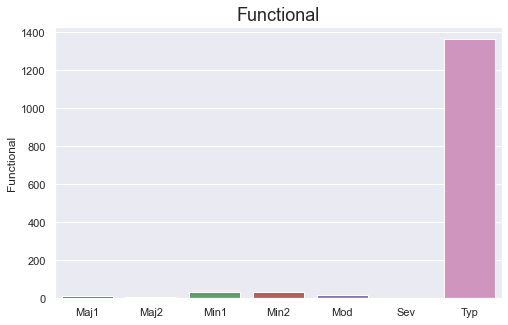

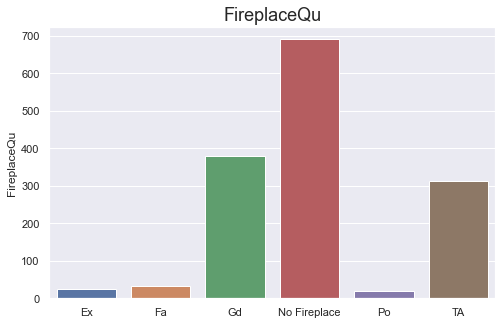

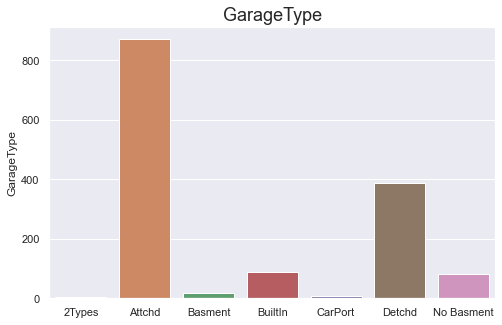

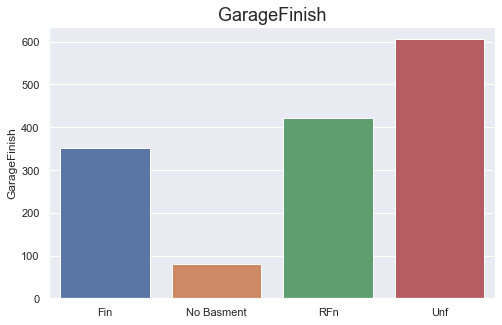

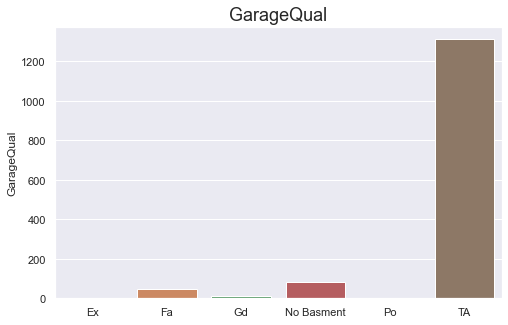

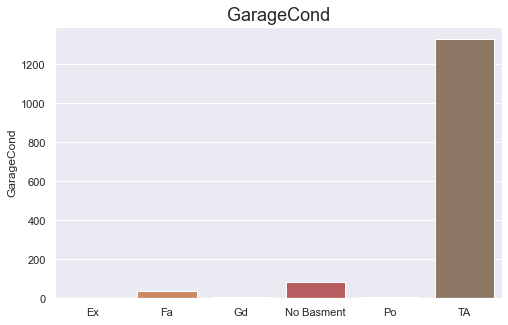

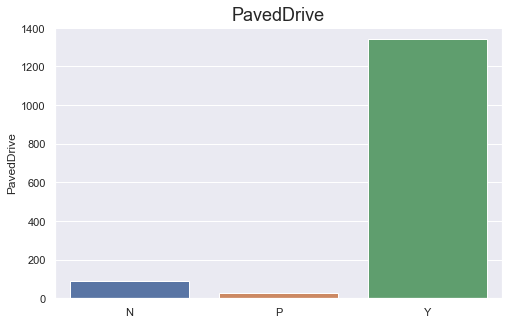

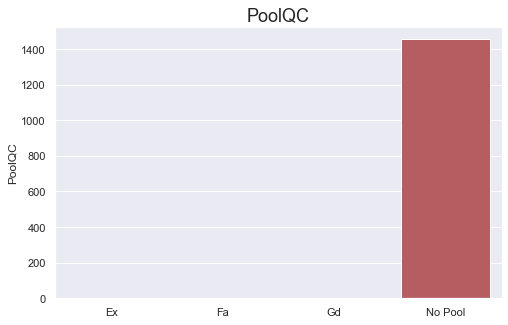

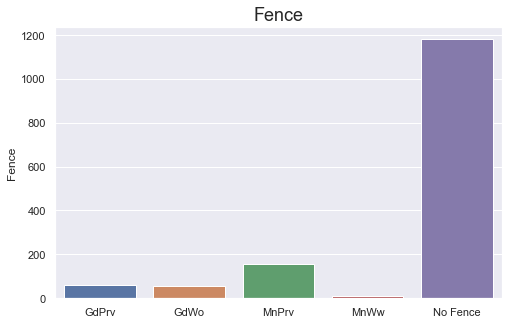

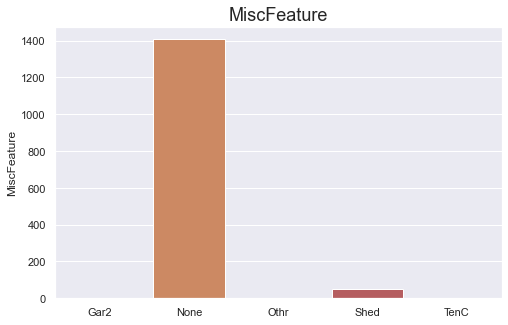

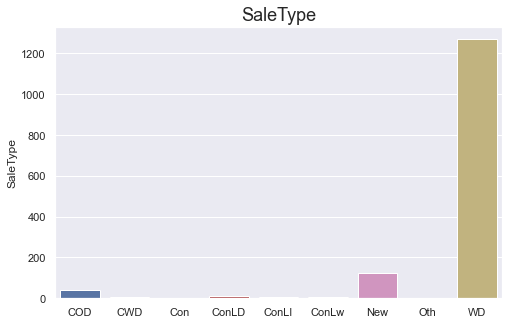

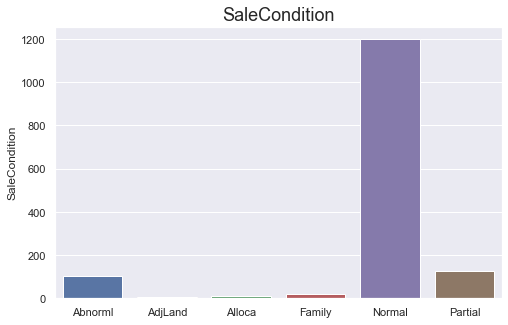

In [576]:
for col in catdatadf.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(catdatadf[col].value_counts().index, catdatadf[col].value_counts())
    plt.show()

#### From the graphs above we can see that some of the columns can be removed directly as they are not adding any variance to our data and hence are not at all useful. 

    - BsmtCond
    - BsmtFinType2
    - BsmtExposure
    - GarageQual
    - GarageCond

In [577]:
catdatadf.drop(['BsmtCond','BsmtFinType2','BsmtExposure','GarageQual','GarageCond'],axis=1,inplace = True)

In [578]:
# convert into dummies
data_dummies = pd.get_dummies(catdatadf, drop_first=True)
data_dummies.head()

,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,20,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,60,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,70,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,60,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [579]:
data = data.drop(['Id'],axis=1)

In [580]:
# Adding the dummy categorical column to original dataset
data = pd.concat([data,data_dummies], axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [581]:
# Droping the original categorical column
data = data.drop(list(catdatadf.columns), axis=1)
data.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,2003,TA,No,706,Unf,0,...,0,0,0,0,1,0,0,0,1,0
1,9600,6,8,1976,1976,TA,Gd,978,Unf,0,...,0,0,0,0,1,0,0,0,1,0
2,11250,7,5,2001,2002,TA,Mn,486,Unf,0,...,0,0,0,0,1,0,0,0,1,0
3,9550,7,5,1915,1970,Gd,No,216,Unf,0,...,0,0,0,0,1,0,0,0,0,0
4,14260,8,5,2000,2000,TA,Av,655,Unf,0,...,0,0,0,0,1,0,0,0,1,0


In [582]:
data.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking for outliers

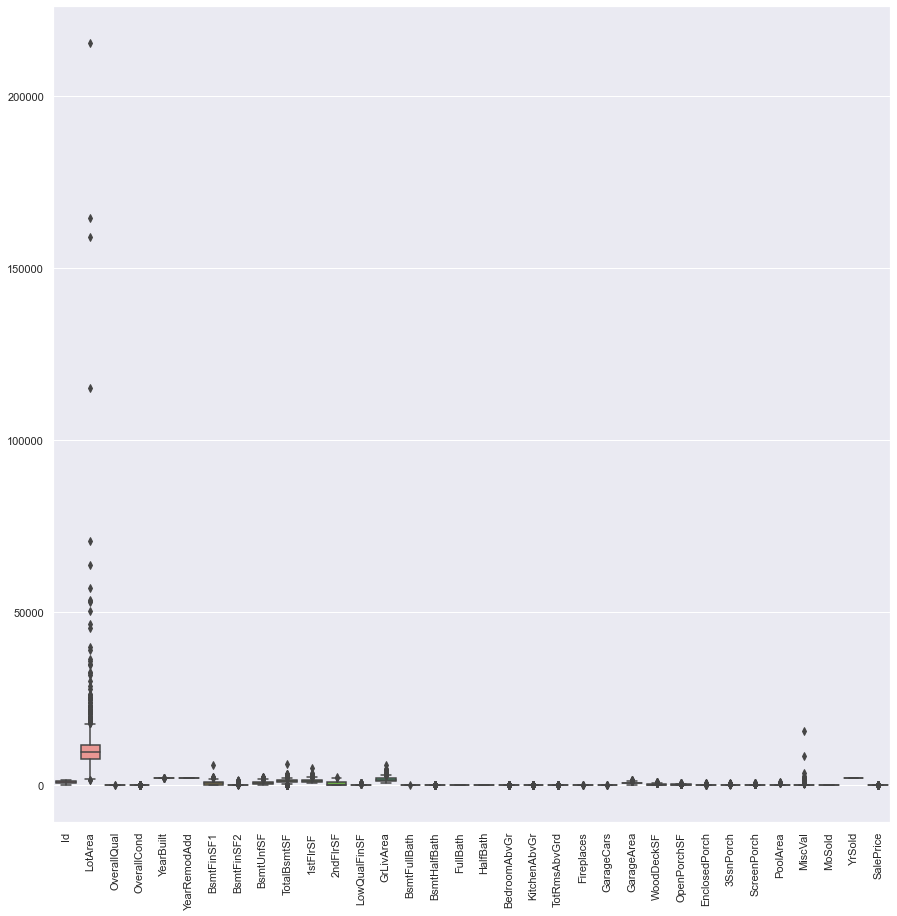

In [583]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=numdatadf);

In [584]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in numdatadf.columns:
    numdatadf[col][numdatadf[col] <= numdatadf[col].quantile(0.05)] = numdatadf[col].quantile(0.05)
    numdatadf[col][numdatadf[col] >= numdatadf[col].quantile(0.95)] = numdatadf[col].quantile(0.95)

<AxesSubplot:>

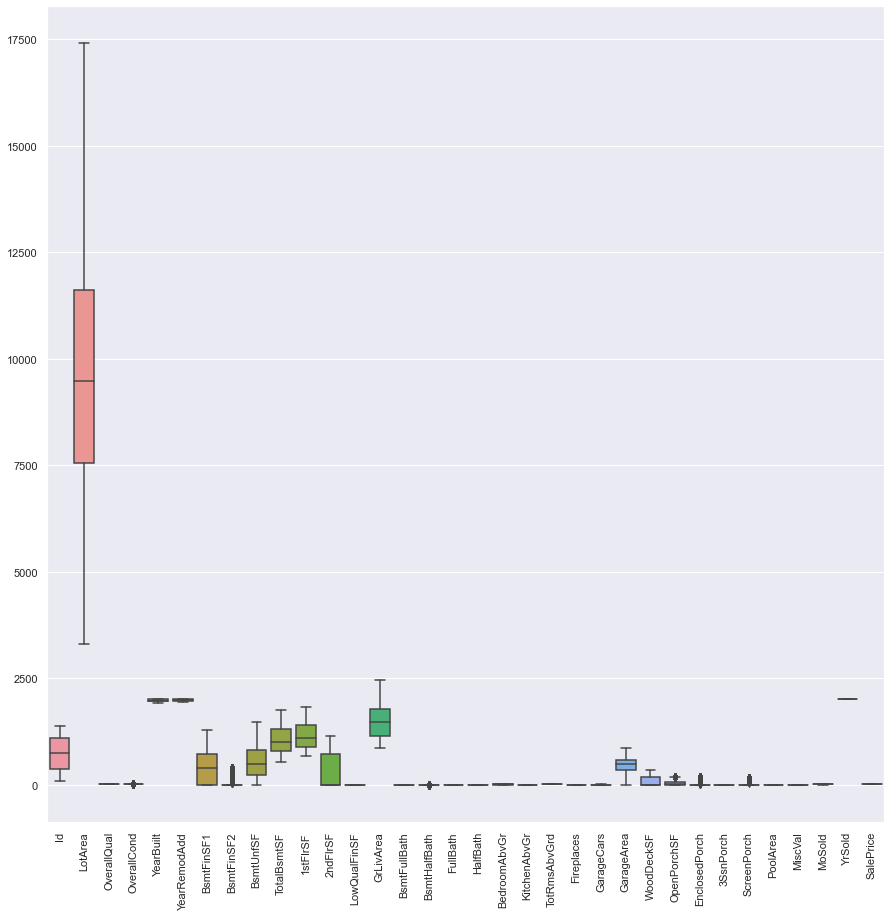

In [585]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=numdatadf)

In [586]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([numdatadf, data_dummies], axis=1)

# View the first few rows of our dataframe
df.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,73.95,8450.0,7,5,2003,2003,706,0.0,150,856.0,...,0,0,0,0,1,0,0,0,1,0
1,73.95,9600.0,6,8,1976,1976,978,0.0,284,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,73.95,11250.0,7,5,2001,2002,486,0.0,434,920.0,...,0,0,0,0,1,0,0,0,1,0
3,73.95,9550.0,7,5,1916,1970,216,0.0,540,756.0,...,0,0,0,0,1,0,0,0,0,0
4,73.95,14260.0,8,5,2000,2000,655,0.0,490,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [587]:
df = df.drop(['Id'],axis=1)
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450.0,7,5,2003,2003,706,0.0,150,856.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,9600.0,6,8,1976,1976,978,0.0,284,1262.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,11250.0,7,5,2001,2002,486,0.0,434,920.0,920.0,...,0,0,0,0,1,0,0,0,1,0
3,9550.0,7,5,1916,1970,216,0.0,540,756.0,961.0,...,0,0,0,0,1,0,0,0,0,0
4,14260.0,8,5,2000,2000,655,0.0,490,1145.0,1145.0,...,0,0,0,0,1,0,0,0,1,0


### Finding out which are the top 20 variables that affect the target variable 'Sale Price'

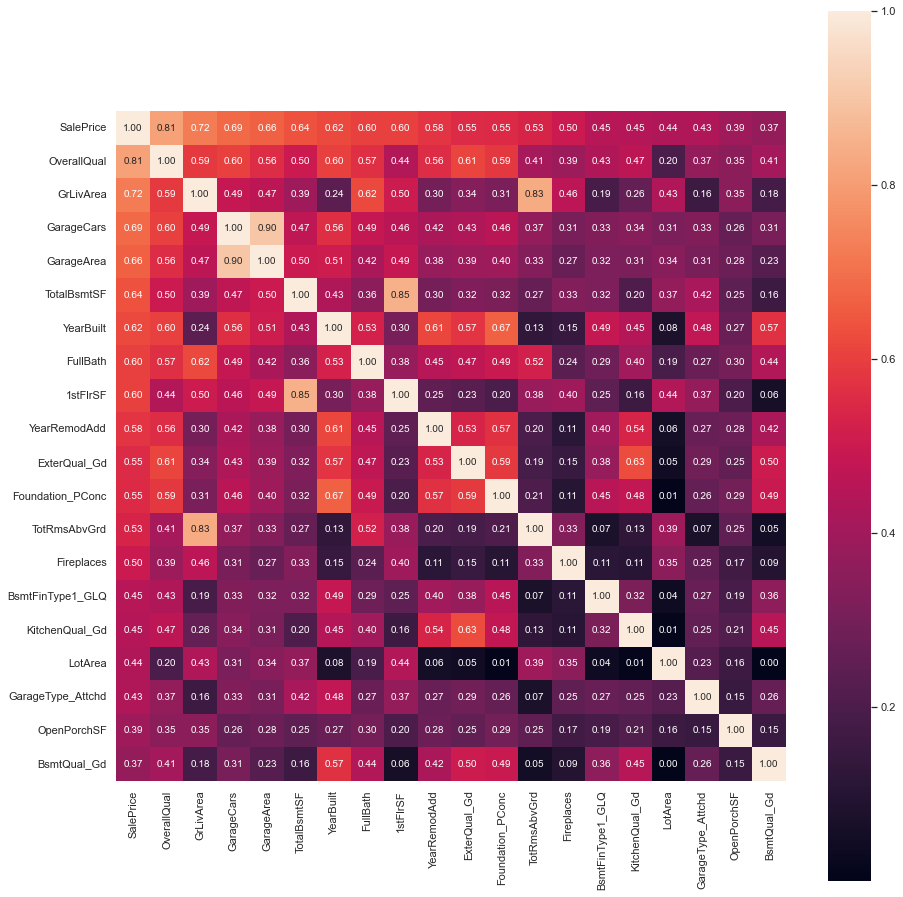

In [588]:
k = 20
corrmat = df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cmat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
plt.figure(figsize=(15, 16))
hm = sns.heatmap(cmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Seperating the target variable from the dataset

In [589]:
maindata = df.drop(['SalePrice'], axis=1).copy()
maindata.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450.0,7,5,2003,2003,706,0.0,150,856.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,9600.0,6,8,1976,1976,978,0.0,284,1262.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,11250.0,7,5,2001,2002,486,0.0,434,920.0,920.0,...,0,0,0,0,1,0,0,0,1,0
3,9550.0,7,5,1916,1970,216,0.0,540,756.0,961.0,...,0,0,0,0,1,0,0,0,0,0
4,14260.0,8,5,2000,2000,655,0.0,490,1145.0,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [590]:
target_var = df['SalePrice'].copy()
target_var.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

#### Splitting the data into train and test data sets

In [591]:

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(maindata, target_var, test_size=0.3, random_state=42, shuffle=True)

#### Viewing the dimensions of the train and test data

In [592]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1022, 232)
(1022,)
(438, 232)
(438,)


In [593]:
num_cols=X_train.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSSubClass'],
      dtype='object')

#### Scaling the data using StandardScaler()

In [594]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Now the data has been scaled and we can move towards building the model. We will also use RFE to know which of the variables are important

In [595]:
np.where(np.isnan(df))

(array([], dtype=int64), array([], dtype=int64))

In [596]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20) # Running RFE with the output number of the variable equal to 20
rfe = rfe.fit(X_train, y_train)

In [597]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', False, 80),
 ('OverallQual', False, 20),
 ('OverallCond', False, 75),
 ('YearBuilt', False, 62),
 ('YearRemodAdd', False, 125),
 ('BsmtFinSF1', False, 65),
 ('BsmtFinSF2', False, 136),
 ('BsmtUnfSF', False, 134),
 ('TotalBsmtSF', False, 201),
 ('1stFlrSF', False, 92),
 ('2ndFlrSF', False, 108),
 ('LowQualFinSF', False, 18),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 207),
 ('BsmtHalfBath', False, 195),
 ('FullBath', False, 189),
 ('HalfBath', False, 177),
 ('BedroomAbvGr', False, 180),
 ('KitchenAbvGr', False, 28),
 ('TotRmsAbvGrd', False, 209),
 ('Fireplaces', False, 194),
 ('GarageCars', False, 211),
 ('GarageArea', False, 56),
 ('WoodDeckSF', False, 146),
 ('OpenPorchSF', False, 141),
 ('EnclosedPorch', False, 160),
 ('3SsnPorch', False, 21),
 ('ScreenPorch', False, 158),
 ('PoolArea', False, 17),
 ('MiscVal', False, 22),
 ('MoSold', False, 193),
 ('YrSold', False, 213),
 ('MSSubClass', False, 145),
 ('MSZoning_FV', False, 7),
 ('MSZoning_RH', False, 40),
 ('MSZo

In [598]:
col = X_train.columns[rfe.support_]
col

Index(['GrLivArea', 'Neighborhood_Blueste', 'Neighborhood_Veenker',
       'Condition2_RRAe', 'BldgType_Twnhs', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'Exterior2nd_CBlock',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtFinType1_No Basment', 'Heating_OthW', 'CentralAir_Y',
       'Functional_Maj2'],
      dtype='object')

In [599]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [600]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          1.38e-285
Time:                        22:46:13   Log-Likelihood:                 327.25
No. Observations:                1022   AIC:                            -614.5
Df Residuals:                    1002   BIC:                            -515.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      11.9706      0.057    211.041      0.000      11.859      12.082
GrLivArea                   0.1938      0.006     32.103      0.000       0.182       0.206
Neighborhood_Blueste       -0.3205      0.178     -1.804      0.072      -0.669       0.028
Neighborhood_Veenker        0.1915      0.064      2.992      0.003       0.066       0.317
Condition2_RRAe            -0.7744      0.200     -3.870      0.000      -1.167      -0.382
BldgType_Twnhs             -0.2223      0.034     -6.596      0.000      -0.288      -0.156
RoofStyle_Gable            -0.3473      0.091     -3.799      0.000      -0.527      -0.168
RoofStyle_Gambrel          -0.3620      0.109     -3.322      0.001      -0.576      -0.148
RoofStyle_Hip              -0.2530      0.092     -2.765      0.006      -0.433      -0.073
RoofStyle_Mansard          -0.2958      0.117     -2.535      0.011      -0.525      -0.067
RoofMatl_CompShg            0.2965      0.083      3.594      0.000       0.135       0.458
RoofMatl_WdShngl            0.4525      0.122      3.707      0.000       0.213       0.692
Exterior2nd_CBlock         -0.2859      0.178     -1.609      0.108      -0.635       0.063
Foundation_Wood            -0.2181      0.103     -2.121      0.034      -0.420      -0.016
BsmtQual_Fa                -0.3560      0.036    -10.025      0.000      -0.426      -0.286
BsmtQual_No Basement       -0.2067      0.019    -11.032      0.000      -0.243      -0.170
BsmtQual_TA                -0.2634      0.012    -21.340      0.000      -0.288      -0.239
BsmtFinType1_No Basment    -0.2067      0.019    -11.032      0.000      -0.243      -0.170
Heating_OthW               -0.3472      0.128     -2.716      0.007      -0.598      -0.096
CentralAir_Y                0.2501      0.023     10.918      0.000       0.205       0.295
Functional_Maj2            -0.2372      0.090     -2.649      0.008      -0.413      -0.061
==============================================================================
Omnibus:                       50.386   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.643
Skew:                          -0.426   Prob(JB):                     1.02e-16
Kurtosis:                       4.002   Cond. No.                     8.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.94e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Ridge Regression

In [601]:
from sklearn.model_selection import GridSearchCV

# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [602]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 5.0}
-0.07672235156010562


In [603]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000116,0.000232,0.003236,0.004003,0.0001,{'alpha': 0.0001},-0.078327,-0.089683,-0.080375,-0.084771,...,-0.082372,0.004312,26,-0.056035,-0.052793,-0.055392,-0.054797,-0.056530,-0.055109,0.001298
1,0.006898,0.008505,0.000000,0.000000,0.001,{'alpha': 0.001},-0.078327,-0.089670,-0.080354,-0.084763,...,-0.082361,0.004312,25,-0.056070,-0.052796,-0.055424,-0.054819,-0.056537,-0.055129,0.001303
2,0.008870,0.007302,0.000247,0.000494,0.01,{'alpha': 0.01},-0.078283,-0.089562,-0.080193,-0.084703,...,-0.082263,0.004312,24,-0.056388,-0.052827,-0.055696,-0.055015,-0.056597,-0.055305,0.001358
3,0.011654,0.007198,0.000893,0.001785,0.05,{'alpha': 0.05},-0.077689,-0.089236,-0.079437,-0.084598,...,-0.081817,0.004453,23,-0.057163,-0.052967,-0.056420,-0.055571,-0.056817,-0.055788,0.001507
4,0.003125,0.006249,0.000000,0.000000,0.1,{'alpha': 0.1},-0.076729,-0.089017,-0.078761,-0.084510,...,-0.081353,0.004686,22,-0.057637,-0.053121,-0.056912,-0.055885,-0.057042,-0.056120,0.001602
5,0.004054,0.006081,0.006271,0.007681,0.2,{'alpha': 0.2},-0.075063,-0.088894,-0.077711,-0.084231,...,-0.080645,0.005132,21,-0.058204,-0.053376,-0.057499,-0.056239,-0.057437,-0.056551,0.001709
6,0.009622,0.007869,0.009500,0.007760,0.3,{'alpha': 0.3},-0.073823,-0.088813,-0.076857,-0.084032,...,-0.080090,0.005502,19,-0.058603,-0.053596,-0.057893,-0.056471,-0.057759,-0.056865,0.001773
7,0.007274,0.007103,0.000099,0.000198,0.4,{'alpha': 0.4},-0.072973,-0.088733,-0.076166,-0.083862,...,-0.079650,0.005776,18,-0.058924,-0.053785,-0.058217,-0.056666,-0.058014,-0.057122,0.001821
8,0.013611,0.004301,0.000000,0.000000,0.5,{'alpha': 0.5},-0.072380,-0.088682,-0.075621,-0.083656,...,-0.079292,0.005976,17,-0.059197,-0.053945,-0.058519,-0.056840,-0.058231,-0.057346,0.001866
9,0.011908,0.006258,0.002402,0.003241,0.6,{'alpha': 0.6},-0.071919,-0.088632,-0.075150,-0.083432,...,-0.078979,0.006130,15,-0.059426,-0.054084,-0.058805,-0.056996,-0.058422,-0.057547,0.001906


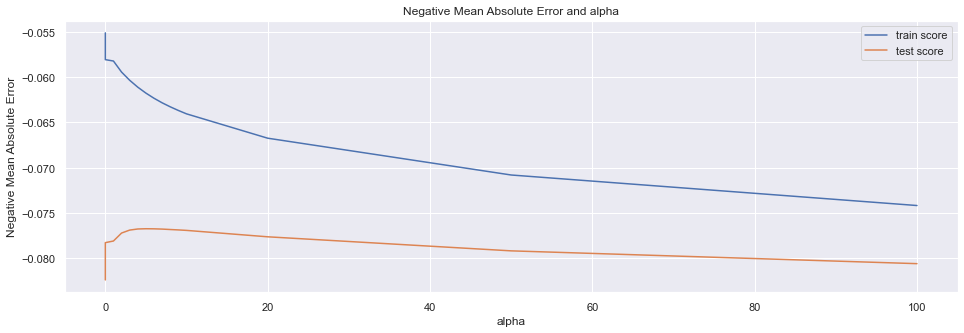

In [604]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [605]:
#final ridge model
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.64094762e-02,  5.72523950e-02,  4.16047626e-02,  5.13506987e-02,
        1.83728845e-02, -3.82090385e-03, -6.17870148e-03, -3.07470382e-02,
        6.50960312e-02, -2.10214420e-03,  1.78045220e-02,  0.00000000e+00,
        9.72192317e-02,  8.05052015e-03, -1.08702021e-03,  9.24122231e-03,
        9.22309664e-03,  7.49928373e-03,  0.00000000e+00,  7.88771550e-04,
        1.85885973e-02,  2.26972602e-02,  1.07748063e-02,  1.26819022e-02,
        7.15935470e-03,  6.27687375e-03,  0.00000000e+00,  9.69779914e-03,
        0.00000000e+00,  0.00000000e+00,  2.10846367e-03, -1.35078685e-03,
       -1.65182800e-02,  4.08923037e-02,  1.87575789e-02,  2.27486355e-02,
       -1.71816070e-02, -1.06380583e-02, -8.89241196e-03,  3.41846893e-02,
        1.48060078e-02, -3.15322952e-02, -1.38750637e-03,  4.90479424e-02,
        1.77913057e-02,  2.44725918e-02, -2.99419802e-02,  1.57666367e-02,
       -3.02229543e-02, -1.02007181e-02, -3.97947463e-03,  9.63039824e-03,
        6.16150890e-02, -

In [606]:
#lets predict the R-squared value 
from sklearn import metrics # Importing the SciKit 
from sklearn.metrics import r2_score

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9366925343119334


In [607]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9197350141922784


In [608]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.010128671448243755

## Lasso Regression

In [609]:
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [610]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [611]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.07795014812660542


In [612]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [613]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9179315511361072


In [614]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9254158399644874


In [615]:
mean_squared_error(y_test, y_test_pred)

0.009411805716288637

In [616]:
lasso.coef_

array([ 0.0252829 ,  0.07191698,  0.0424226 ,  0.05280842,  0.01826901,
        0.02077847,  0.        , -0.00897589,  0.04583502, -0.        ,
        0.00639176,  0.        ,  0.10480562,  0.00959237, -0.        ,
        0.0026966 ,  0.00676011,  0.        ,  0.        , -0.        ,
        0.02276268,  0.02763603,  0.01034166,  0.01266079,  0.0062212 ,
        0.00367433,  0.        ,  0.00999737,  0.        ,  0.        ,
        0.00031758, -0.        , -0.01285225,  0.        , -0.        ,
        0.        , -0.04364986, -0.        , -0.        ,  0.00286393,
        0.        , -0.        , -0.0033471 ,  0.02030959,  0.        ,
       -0.        , -0.        ,  0.01050895, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.03199706,  0.01835272, -0.        ,  0.07460398, -0.02434924,
       -0.        ,  0.        , -0.        , -0.        , -0.00660479,
        0.        , -0.00386084,  0.        ,  0.03039426, -0.  

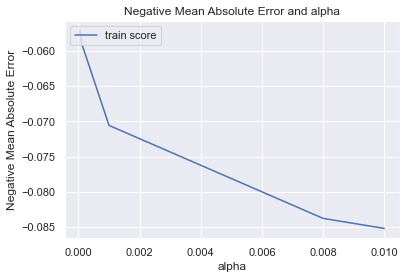

In [617]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [618]:
model_cv.best_params_

{'alpha': 5.0}

In [619]:
ridge = Ridge(alpha = 5)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9366925343119334
0.9197350141922784


In [620]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [621]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,LotFrontage,11.714014
229,SaleCondition_AdjLand,0.103432
13,GrLivArea,0.097219
59,Neighborhood_CollgCr,0.089254
87,Condition2_Feedr,0.080385
192,Functional_Sev,0.079597
118,Exterior1st_BrkComm,0.076901
9,TotalBsmtSF,0.065096
53,LandSlope_Mod,0.061615
2,OverallQual,0.057252


In [622]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9179315511361072
0.9254158399644874


Best alpha value for Lasso : {'alpha': 0.001}
Best alpha value for Ridge : {'alpha': 5.0}

After comparing both Ridge and Lasso models we can say that the following features define the data in the best possible way

- 	LotFrontage
-  	SaleCondition_AdjLand
-  	GrLivArea
-  	Neighborhood_CollgCr
-  	Condition2_Feedr
-  	Functional_Sev
-  	Exterior1st_BrkComm
- 	TotalBsmtSF
-  	LandSlope_Mod
- 	OverallQual

In [623]:
betas = pd.DataFrame(index=maindata.columns)
betas.rows = maindata.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas.head(10)

,Ridge,Lasso
LotArea,0.026409,0.025283
OverallQual,0.057252,0.071917
OverallCond,0.041605,0.042423
YearBuilt,0.051351,0.052808
YearRemodAdd,0.018373,0.018269
BsmtFinSF1,-0.003821,0.020778
BsmtFinSF2,-0.006179,0.000000
BsmtUnfSF,-0.030747,-0.008976
TotalBsmtSF,0.065096,0.045835
1stFlrSF,-0.002102,-0.000000


### View the features removed by Lasso i.e. feature selection done by Lasso


In [624]:
print(betas[betas['Lasso']==0])

                          Ridge  Lasso
BsmtFinSF2            -0.006179    0.0
1stFlrSF              -0.002102   -0.0
LowQualFinSF           0.000000    0.0
BsmtHalfBath          -0.001087   -0.0
BedroomAbvGr           0.007499    0.0
...                         ...    ...
SaleType_New           0.015373    0.0
SaleType_Oth           0.026569    0.0
SaleCondition_AdjLand  0.040166    0.0
SaleCondition_Alloca   0.103432    0.0
SaleCondition_Family  -0.010575   -0.0

[169 rows x 2 columns]


### Viewing the top 10 co-efficients in Ridge and Lasso Regression

In [625]:
print(betas['Ridge'].sort_values(ascending=False)[:10])


SaleCondition_Alloca    0.103432
GrLivArea               0.097219
Neighborhood_Crawfor    0.089254
Condition2_Norm         0.080385
Functional_Typ          0.079597
Exterior1st_BrkFace     0.076901
TotalBsmtSF             0.065096
LandSlope_Sev           0.061615
OverallQual             0.057252
Neighborhood_StoneBr    0.055974
Name: Ridge, dtype: float64


### Since we have scaled the target variable with a log transformation, we have to do inverse log of the betas of both Ridge & Lasso to get a correct value

In [626]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

SaleCondition_Alloca    1.108971
GrLivArea               1.102102
Neighborhood_Crawfor    1.093358
Condition2_Norm         1.083705
Functional_Typ          1.082850
Exterior1st_BrkFace     1.079935
TotalBsmtSF             1.067262
LandSlope_Sev           1.063553
OverallQual             1.058923
Neighborhood_StoneBr    1.057570
Name: Ridge, dtype: float64

In [627]:
print(betas['Lasso'].sort_values(ascending=False)[:10])

GrLivArea               0.104806
Neighborhood_Crawfor    0.074604
OverallQual             0.071917
Exterior1st_BrkFace     0.070085
Functional_Typ          0.065440
YearBuilt               0.052808
Neighborhood_Somerst    0.046717
Condition1_Norm         0.046140
TotalBsmtSF             0.045835
OverallCond             0.042423
Name: Lasso, dtype: float64


In [628]:
ridge_coeffs = np.exp(betas['Lasso'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.110495
Neighborhood_Crawfor    1.077457
OverallQual             1.074566
Exterior1st_BrkFace     1.072599
Functional_Typ          1.067629
YearBuilt               1.054228
Neighborhood_Somerst    1.047825
Condition1_Norm         1.047221
TotalBsmtSF             1.046902
OverallCond             1.043335
Name: Lasso, dtype: float64

### From the above analysis we can say that the following common variables are helpful in predicting the house prices

- GrLivArea
- Neighborhood_Crawfor
- OverallQual
- Exterior1st_BrkFace
- Functional_Typ
- TotalBsmtSF